# Demo: Solve TSP with Simulated Annealing

## References:
[1] http://www.stat.yale.edu/~pollard/Courses/251.spring2013/Handouts/Chang-MoreMC.pdf
[2] http://toddwschneider.com/posts/traveling-salesman-with-simulated-annealing-r-and-shiny/

## 1. Simulated Annealing

## 2. Traveling Salesman Problem


In [1]:
% matplotlib notebook
# Generates Cities
from random import random
import matplotlib.pyplot as plt

cities = []
num_cities = 40

for i in range(num_cities):
    cities.append((random(), random()))
    
x = [c[0] for c in cities]
y = [c[1] for c in cities]

pl = plt.scatter(x, y)

<IPython.core.display.Javascript object>

In [2]:
# Utility function

def distance_between_cities(city_1, city_2):
    return (city_2[0] - city_1[0]) ** 2 + (city_2[1] - city_1[1]) ** 2

def calculate_distance(order):
    distance = 0
    for i in range(1, num_cities):
        distance += distance_between_cities(order[i-1], order[i])
    distance += distance_between_cities(order[num_cities-1], order[0])
    return distance


<IPython.core.display.Javascript object>


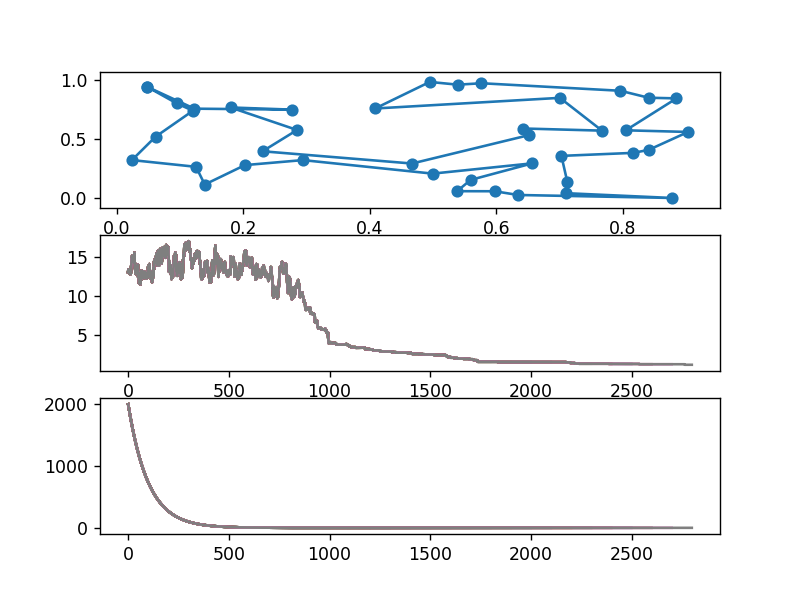

[(0.04772706221021128, 0.9469511117558947), (0.12283378628555519, 0.7600901444235814), (0.27649806135295074, 0.7520694560757305), (0.1798483659984702, 0.7703160868706043), (0.2850345498247828, 0.5787856753603126), (0.230482572572412, 0.39779288715456473), (0.466545581592674, 0.2936767389205871), (0.6514415031201447, 0.5351553284923835), (0.6426271431099003, 0.5914661041094028), (0.7668097187458784, 0.573273428975259), (0.7002389937639051, 0.8521227639212715), (0.4082684747360895, 0.7616605877426512), (0.4947198287943674, 0.9875715404354546), (0.5390680941753533, 0.9640617330047344), (0.5762878237489093, 0.976406114334496), (0.7958284505808342, 0.9124011556138792), (0.8403900241140164, 0.8531408723311761), (0.8845193410050012, 0.8476743908591918), (0.8043921947959072, 0.5761287750396195), (0.9028013392110544, 0.5621439041499464), (0.8403104557710375, 0.40911606170892356), (0.8158340870106888, 0.384146776999166), (0.7026641946968283, 0.3586568187440451), (0.7120482108949497, 0.1364119020

In [17]:
# Simulated Annealing
from random import shuffle, choices, uniform
from math import exp
from copy import copy
import time

temperature = 2000
cooling_factor = 0.99
min_temperature =  10e-10

temperature_record = []
td_record = []
iteration_time = 0

present_solution = cities
shuffle(present_solution)
opt_total_distance = calculate_distance(present_solution)

x = [c[0] for c in present_solution]
y = [c[1] for c in present_solution]

plt.figure(2)
fig, (fa, fb, fc) = plt.subplots(3, 1)
fa.scatter(x, y)
fa.plot(x, y)

while temperature > min_temperature:
    # Generate new solution
    new_solution = copy(present_solution)
    selected = choices(range(num_cities), k=2)
    low = min(selected)
    hi = max(selected)
    new_solution[low:hi+1] = reversed(new_solution[low:hi+1])
    td = calculate_distance(new_solution)
    temperature_record.append(temperature)
    if td > opt_total_distance:
        threhold = exp(-(td-opt_total_distance)/temperature)
        fate = uniform(0, 1)
        if fate < threhold:
            present_solution = copy(new_solution)
            opt_total_distance = td
    else:
        present_solution = copy(new_solution)
        opt_total_distance = td
    td_record.append(opt_total_distance)
    iteration_time += 1
    

    
    if(iteration_time % 100 == 0):
        fa.cla()
        x = [c[0] for c in present_solution]
        y = [c[1] for c in present_solution]
        x.append(x[0])
        y.append(y[0])
        fa.scatter(x, y)
        fa.plot(x, y)
        fb.plot(range(iteration_time), td_record)
        fc.plot(range(iteration_time), temperature_record)
        fig.canvas.draw()
    
    temperature *= cooling_factor

print(present_solution)